$$\text{Applied Machine Learning in Python}$$
$$\text{week 7}$$

* Support Vector Machine
    * Kernel SVM
    * Example: Recognising hand-written digits
* Time-series data
* Signature method
* Decision Trees

$$\textbf{Kernel Support Vector Machine}$$

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# inline figures
%matplotlib inline
# import data sets
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict, train_test_split

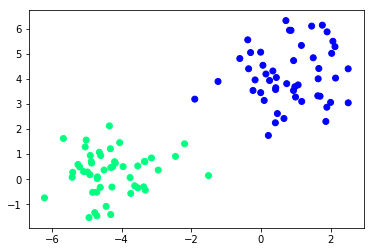

In [113]:
# linearly separable case
from sklearn.datasets import make_blobs
X_blob, y_blob = make_blobs(n_samples=100, n_features=2, centers=2, random_state=3)
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap='winter');

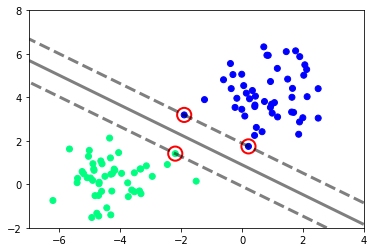

In [121]:
# Linear SVM
# classify with linear SVM?
clf_svm_linear = SVC(kernel='linear')
clf_svm_linear.fit(X_blob, y_blob)
# plot decision boundary
x_1, x_2 = np.meshgrid(np.linspace(-7, 4, num=100), 
                    np.linspace(-2, 8, num=100))
xy = np.vstack([x_1.ravel(), x_2.ravel()]).T
P = clf_svm_linear.decision_function(xy).reshape(x_2.shape)
plt.contour(x_1, x_2, P, colors='k',
levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'], 
linewidths=3)
plt.scatter(clf_svm_linear.support_vectors_[:, 0], 
                   clf_svm_linear.support_vectors_[:, 1], 
                   s=200, linewidth=2, 
                   facecolors='none', edgecolors='r');
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap='winter');

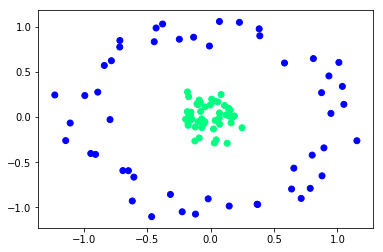

In [123]:
# make some circles
from sklearn.datasets import make_circles
X_cir, y_circ = make_circles(n_samples=100, factor=0.1, noise=0.1)
plt.scatter(X_cir[:,0], X_cir[:,1], c=y_circ, cmap='winter')

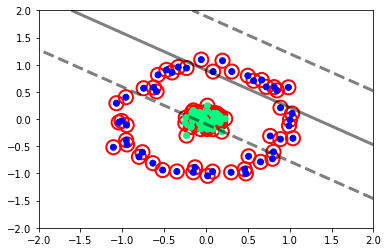

In [122]:
# classify with linear SVM?
clf_svm_linear_circ = SVC(kernel='linear')
clf_svm_linear_circ.fit(X_cir, y_circ)
# plot decision boundary
x_1, x_2 = np.meshgrid(np.linspace(-2, 2, num=100), 
                    np.linspace(-2, 2, num=100))
xy = np.vstack([x_1.ravel(), x_2.ravel()]).T
P = clf_svm_linear.decision_function(xy).reshape(x_2.shape)
plt.contour(x_1, x_2, P, colors='k',
levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'], 
linewidths=3)
plt.scatter(clf_svm_linear_circ.support_vectors_[:, 0], 
                   clf_svm_linear_circ.support_vectors_[:, 1], 
                   s=200, linewidth=2, 
                   facecolors='none', edgecolors='r');
plt.scatter(X_cir[:,0], X_cir[:,1], c=y_circ, cmap='winter');

$$\textbf{Positive-definite Kernel}$$

<img src="plots/pdk.png"  align="center" style="width: 2500px;"/>

The word **kernel** is used in mathematics to denote a weighting function for a weighted sum or integral. **Kernel** is a way of computing the dot product of two vectors x and y in some (possibly very high dimensional) feature space, which is why kernel functions are sometimes called "generalised dot product".

Consider a mapping $\phi: R^{n} → R^{m}$ that brings the vectors in $R^{n}$ to some feature space $R^{m}$. Then the dot product of x and y in this space is $\phi(\vec{x})^T\phi(\vec{y})$. A kernel **K** is a function that corresponds to this dot product, i.e. $$K(\vec{x},\vec{y})=\phi(\vec{x})^T\phi(\vec{y})$$

<img src="plots/kernels.png"  align="center" style="width: 500px;"/>

Example: consider a simple polynomial kernel $K(\vec{x},\vec{y})=(1+\vec{x}^T\vec{y})^2$ with $x,y\in R^2$. This doesn't correspond to any mapping function $\phi$, this is a function that returns a real number. Now, assuming that $\vec{x}=(x_1,x_2)$ and $\vec{y}=(y_1,y_2)$, let's expand this expression: $K(\vec{x},\vec{y})=(1+\vec{x}^T\vec{y})^2=(1+x_1 y_1+x_2 y_2)^2 = 1+x_1^2y_1^2+x_2^2 y_2^2 + 2x_1 y_1 + 2x_2y_2 + 2x_1 x_2 y_1 y_2$

But this is nothing else, but a dot product between two vectors: $$v_x = (1, x_1^2, x_2^2, \sqrt{2}x_1,\sqrt{2}x_2, \sqrt{2}x_1 x_2) \\ v_x = (1, y_1^2, y_2^2, \sqrt{2}y_1,\sqrt{2}y_2, \sqrt{2}y_1 y_2)$$

Defining: $$\phi(\vec{z}) = \phi(z_1, z_2) = (1, z_1^2, z_2^2, \sqrt{2}z_1,\sqrt{2}z_2, \sqrt{2}z_1 z_2)$$
$K(\vec{x},\vec{y}) = (1 + \vec{x}^T\vec{y})^2 = \phi(\vec{x})^T \phi(\vec{y})$ computes a dot product in 6-dimensional space without explicitly visiting this space!

The RBF (radial basis function) kernel compares two data points as $K(\vec{x},\vec{y})=exp(−\gamma∥x−y∥^2)$. So if $\vec{x}$ is close to $\vec{y}$, $K$ is close to 1; if it's several multiples of $1/\gamma$ away, $K$ is close to 0.

In [229]:
def kern_poly(x1, x2, d=2):
    return (1 + (x1*x2).sum(axis=1))**d

def kern_rbf(x1, x2, gamma=1.0):
    return np.exp(-gamma*((x1*x2)).sum(axis=1))

# example:
a = np.array([[1.,2.],[3.,4.]])
b = np.array([[5.,6.], [7.,8.]])
print kern_poly(a, b)

[  324.  2916.]


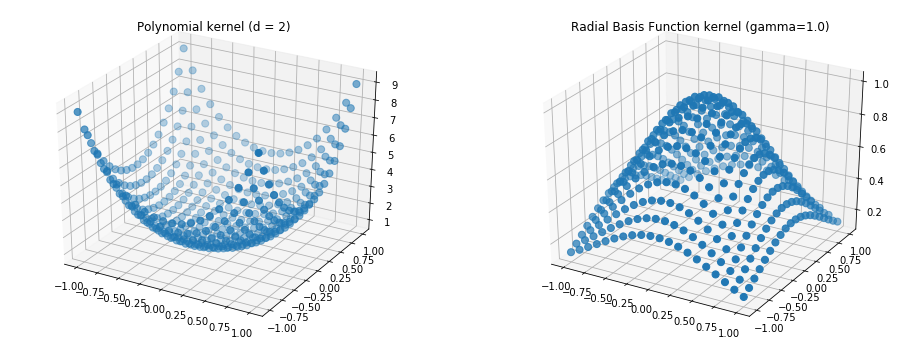

In [615]:
# plot
dg = 2
gamma=1.0
x_1, x_2 = np.meshgrid(np.linspace(-1,1, 20),np.linspace(-1,1, 20))
xy = np.vstack([x_1.ravel(), x_2.ravel()]).T
ax = plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1,projection='3d')
ax.scatter3D(xy[:,0], xy[:,1], kern_poly(xy, xy, d=dg), s=50, cmap='winter');
ax.set_title('Polynomial kernel (d = ' + str(dg)+')')
ax = plt.subplot(1,2,2,projection='3d')
ax.scatter3D(xy[:,0], xy[:,1], kern_rbf(xy, xy, gamma=gamma), s=50, cmap='winter');
ax.set_title('Radial Basis Function kernel (gamma='+str(gamma)+')');

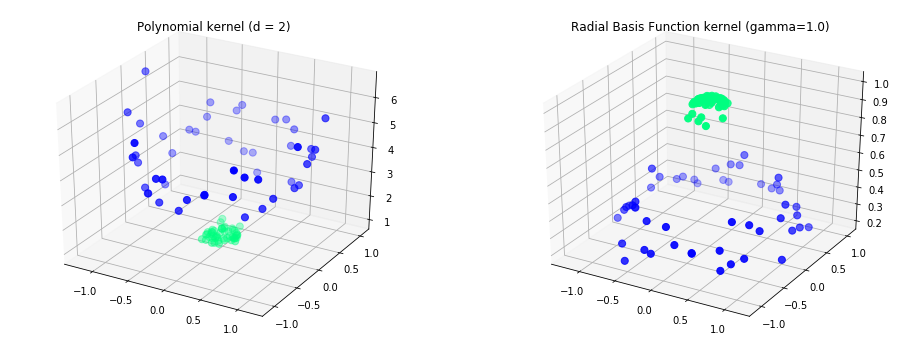

In [260]:
# plotting circles
dg = 2
gamma=1.0
ax = plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1,projection='3d')
ax.scatter3D(X_cir[:,0], X_cir[:,1], kern_poly(X_cir, X_cir, d=dg), c=y_circ,s=50, cmap='winter');
ax.set_title('Polynomial kernel (d = ' + str(dg)+')')
ax = plt.subplot(1,2,2,projection='3d')
ax.scatter3D(X_cir[:,0], X_cir[:,1], kern_rbf(X_cir, X_cir, gamma=gamma), c=y_circ, s=50, cmap='winter');
ax.set_title('Radial Basis Function kernel (gamma='+str(gamma)+')');

             precision    recall  f1-score   support

          0       1.00      0.14      0.25        50
          1       0.54      1.00      0.70        50

avg / total       0.77      0.57      0.47       100



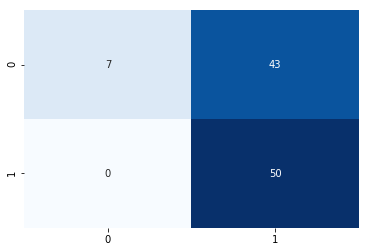

In [273]:
# classification with polynomial and RBF kernels with SVM
clf_svm_linear = SVC(kernel='linear')
y_pred_svm_linear = cross_val_predict(clf_svm_linear, X_cir, y_circ, cv=10)
print metrics.classification_report(y_true=y_circ, y_pred=y_pred_svm_linear)
sns.heatmap(metrics.confusion_matrix(y_true=y_circ, y_pred=y_pred_svm_linear), annot=True, cbar=False, cmap='Blues');

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



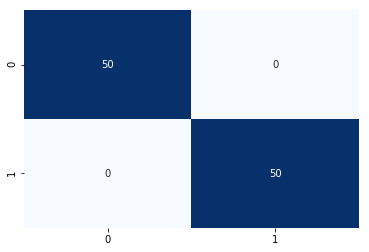

In [274]:
# classification with polynomial and RBF kernels with SVM
clf_svm_poly = SVC(kernel='poly', degree=2)
y_pred_svm_poly = cross_val_predict(clf_svm_poly, X_cir, y_circ, cv=10)
print metrics.classification_report(y_true=y_circ, y_pred=y_pred_svm_poly)
sns.heatmap(metrics.confusion_matrix(y_true=y_circ, y_pred=y_pred_svm_poly), annot=True, cbar=False, cmap='Blues');

$$\textbf{Recognising hand-written digits with Support Vector Machine}$$

In [21]:
# load data
digits = datasets.load_digits()
# example
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

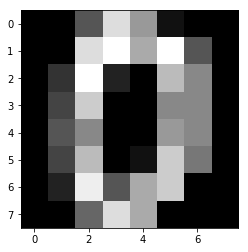

In [275]:
plt.imshow(digits.images[0], cmap='gray');

In [24]:
# digits images organised as matrices 8x8
print digits.images.shape
print digits.target.shape

(1797, 8, 8)
(1797,)


In [277]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
flat_images = digits.images.reshape((n_samples, -1))
print flat_images.shape

(1797, 64)


             precision    recall  f1-score   support

          0       0.98      0.99      0.99       178
          1       0.92      0.97      0.94       182
          2       0.99      0.99      0.99       177
          3       0.96      0.97      0.96       183
          4       0.97      0.97      0.97       181
          5       0.96      0.97      0.96       182
          6       0.99      0.98      0.98       181
          7       0.97      0.93      0.95       179
          8       0.94      0.90      0.92       174
          9       0.94      0.94      0.94       180

avg / total       0.96      0.96      0.96      1797



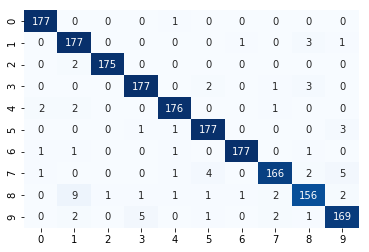

In [296]:
# compare linear to RBF kernels
clf_svm_linear_new = SVC(kernel='linear')
y_pred_svm_linear = cross_val_predict(clf_svm_linear_new, flat_images, digits.target, cv=10)
print metrics.classification_report(y_true=digits.target, y_pred=y_pred_svm_linear)
sns.heatmap(metrics.confusion_matrix(y_true=digits.target, y_pred=y_pred_svm_linear), annot=True, cbar=False, cmap='Blues', fmt='g');

{'degree': 3}
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       178
          1       0.97      0.99      0.98       182
          2       1.00      0.99      1.00       177
          3       0.99      0.98      0.98       183
          4       0.99      0.99      0.99       181
          5       0.97      0.97      0.97       182
          6       0.99      0.98      0.99       181
          7       0.98      0.94      0.96       179
          8       0.98      0.97      0.97       174
          9       0.93      0.97      0.95       180

avg / total       0.98      0.98      0.98      1797



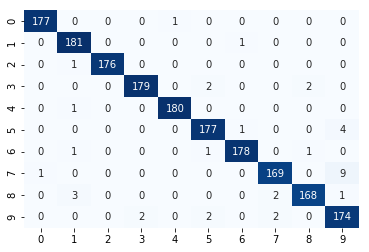

In [301]:
# best polynomial kernel
grid_search_svm_poly = GridSearchCV(estimator=SVC(kernel='poly'),param_grid={'degree':range(12)}, cv=10, n_jobs=-1)
grid_search_svm_poly.fit(flat_images,digits.target);
print grid_search_svm_poly.best_params_
y_pred_svm_poly = cross_val_predict(grid_search_svm_poly.best_estimator_, flat_images, digits.target, cv=10)
print metrics.classification_report(y_true=digits.target, y_pred=y_pred_svm_poly)
sns.heatmap(metrics.confusion_matrix(y_true=digits.target, y_pred=y_pred_svm_poly), annot=True, cbar=False, cmap='Blues', fmt='g');

{'gamma': 0.001623776739188721}
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       178
          1       0.96      0.99      0.98       182
          2       1.00      0.97      0.98       177
          3       0.99      0.97      0.98       183
          4       0.99      0.99      0.99       181
          5       0.97      0.98      0.98       182
          6       0.99      0.98      0.99       181
          7       0.98      0.97      0.98       179
          8       0.96      0.98      0.97       174
          9       0.95      0.97      0.96       180

avg / total       0.98      0.98      0.98      1797



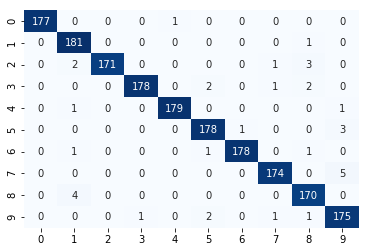

In [302]:
# best RBF kernels
grid_search_svm_rbf = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid={'gamma':np.logspace(-5,2,20)}, cv=10, n_jobs=-1)
grid_search_svm_rbf.fit(flat_images,digits.target);
print grid_search_svm_rbf.best_params_
y_pred_svm_rbf = cross_val_predict(grid_search_svm_rbf.best_estimator_, flat_images, digits.target, cv=10)
print metrics.classification_report(y_true=digits.target, y_pred=y_pred_svm_rbf)
sns.heatmap(metrics.confusion_matrix(y_true=digits.target, y_pred=y_pred_svm_rbf), annot=True, cbar=False, cmap='Blues', fmt='g');

In [307]:
# prediction of digits
X_train, X_test, y_train, y_test = train_test_split(flat_images,digits.target, test_size=0.3)
grid_search_svm_poly.fit(X_train, y_train);
y_predict = grid_search_svm_poly.predict(X_test)

In [323]:
print 'predicted digit:    ' + str(y_predict[0])
print 'ground truth digit: ' + str(y_test[0])

predicted digit:    7
ground truth digit: 7


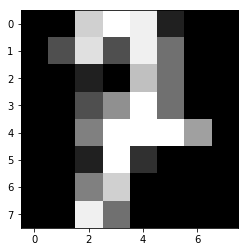

In [324]:
plt.imshow(X_test[0].reshape((8,8)), cmap='gray');

$$\textbf{Time-series data and the signature method}$$

A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

**Time series analysis** comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Fetching financial data from the web:

<img src="plots/rdr.png"  align="center" style="width: 1000px;"/>

<img src="plots/qndl.png"  align="center" style="width: 1000px;"/>

In [326]:
# install "quandl": pip install quandl
import quandl
from datetime import datetime

In [397]:
# you MUST register to obtain your API key (unique for each user)

quandl.ApiConfig.api_key = 'Bgwerxz_hdksjdhfSDFfsdS'
# importing data
data_aapl = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        date = { 'gte': '2015-12-31', 'lte': '2017-12-31' }, 
                        paginate=True)
# save data locally
data_aapl.to_pickle('aaple_data')

In [398]:
data_aapl.sort_values(by='date', ascending=False).head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
501,AAPL,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0
500,AAPL,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
499,AAPL,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
498,AAPL,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
497,AAPL,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0


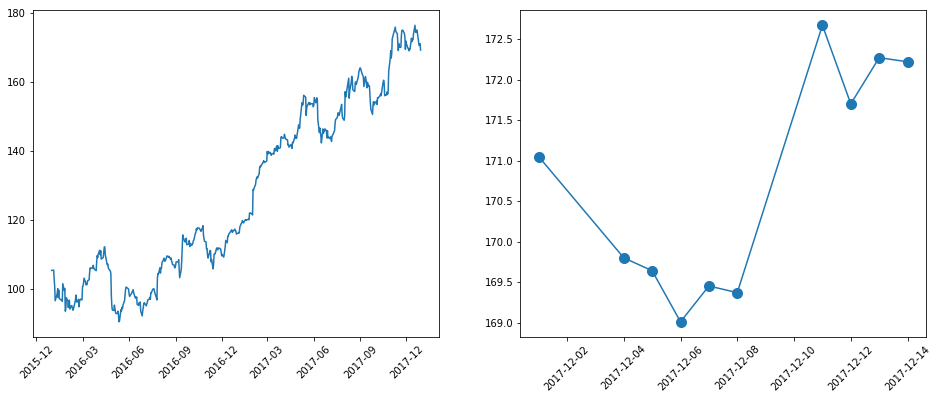

In [390]:
ax = plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1)
ax.plot(data_aapl['date'], data_aapl['close']);
plt.xticks(rotation=45);
ax = plt.subplot(1,2,2)
ax.plot(data_aapl['date'][-20:-10], data_aapl['close'][-20:-10], marker='o', markersize=10);
plt.xticks(rotation=45);


$$\textbf{Feature extraction from sequential data}$$

**The signature method** - based on the Rough Paths theory from stochastic analysis. The signature transformation maps the raw sequential data (embedded into a path) onto the space of _d_-dim real numbers: $$S : \gamma \to \mathbb{R}^d$$
where $\gamma$ is a path from a collection of sequential data. 

**A path from ordered data**

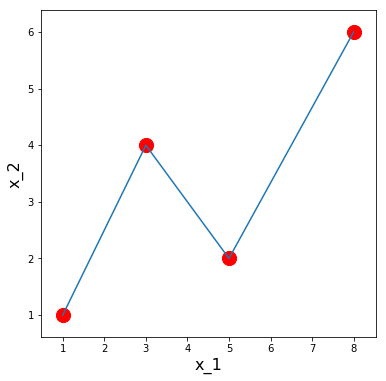

In [417]:
# consider a collection of points
x_1 = np.array([1., 3., 5., 8.])
x_2 = np.array([1., 4., 2., 6.])
fig = plt.figure(figsize=(6,6))
plt.plot(x_1, x_2);
plt.scatter(x_1, x_2, marker='o', c='r', s=200);
plt.xlabel('x_1', fontsize=16);plt.ylabel('x_2', fontsize=16);

The signature is a transformation (mapping) from a path into a collection of real-valued numbers. Each term in the collection has a particular (geometrical) meaning as a function of data points. The general form of the signatures is given by an infinite sequence of iterated integrals (_projections_ or _coordinates_) of a path. The signature is denoted by: $$S = (1, S^{(1)}, S^{(2)}, S^{(1,1)}, S^{(1,2)}, S^{(2,1)}, S^{(2,2)}, S^{(1,1,1)}, S^{(1,1,2)}, S^{(1,2,1)}, S^{(1,2,2)}, S^{(2,1,1)}, ...)$$

where:

* 1 - is the first term and always equals to `1` (zeroth-order approximation)
* $S^{(1)}, S^{(2)}$ - linear terms, correspond to the total increment (net Euclidean distance between the end points along each dimension)
* $S^{(1,1)} = \frac{1}{2}(S^{(1)})^2$ - a square of the first linear term term (with a factor 1/2)
* $S^{(1,2)}, S^{(2,1)}$ - second order approximations (areas under the path computed along directions)
* $S^{(2,2)} = \frac{1}{2}(S^{(2)})^2$ - a square of the second linear term (with a factor 1/2)

**Iterated integrals**

The signature terms $S^{I}$ are represented as iterated integrals: $$S^I = \int_{0<u_1<u_2<...<u_k<T}dX^{i_1}_{u_1}dX^{i_2}_{u_2}...dX^{i_k}_{u_k}$$
where $S^{I}$ are iterated integrals of the path $X$ and $I = (i_1,i_2,i_3,..i_k)$ is the multi-index.

First order terms:

\begin{eqnarray}
S^{({\bf {\color{red}1}})} &=& \int_0^T dX^{{\bf {\color{red}1}}}(t) = X^{{\bf {\color{red}1}}}(T)-X^{{\bf {\color{red}1}}}(0) =   \Delta X^{{\bf {\color{red}1}}}\nonumber\\
S^{({\bf {\color{red}2}})} &=& \int_0^T dX^{{\bf {\color{red}2}}}(t) = X^{{\bf {\color{red}2}}}(T)-X^{{\bf {\color{red}2}}}(0)=\Delta X^{{\bf {\color{red}2}}}\nonumber
\end{eqnarray}

Second order terms:

\begin{eqnarray}
S^{(\bf {\color{red}1},{\color{blue}1})} &=& \int_0^T \left[\int_0^{t_2} dX^{{\bf {\color{red}1}}}(t_1)\right]dX^{{\bf {\color{blue}1}}}(t_2) = %\frac{1}{2}\left(\Delta X^{{\bf 1}}\right)^2\nonumber\\
\frac{1}{2!}\Delta X^{{\bf {\color{red}1}}}\Delta X^{{\bf {\color{blue}1}}}\nonumber\\
S^{(\bf {\color{red}1},{\color{blue}2})} &=& \int_0^T \left[\int_0^{t_2} dX^{{\bf {\color{red}1}}}(t_1)\right]dX^{{\bf {\color{blue}2}}}(t_2) = \dots\nonumber\\
S^{(\bf {\color{red}2},{\color{blue}1})} &=& \int_0^T \left[\int_0^{t_2} dX^{{\bf {\color{red}2}}}(t_1)\right]dX^{{\bf {\color{blue}1}}}(t_2) = \dots\nonumber\\
S^{(\bf {\color{red}2},{\color{blue}2})} &=& \int_0^T \left[\int_0^{t_2} dX^{{\bf {\color{red}2}}}(t_1)\right]dX^{{\bf {\color{blue}2}}}(t_2) = %\frac{1}{2}\left(\Delta X^{{\bf 2}}\right)^2\nonumber
\frac{1}{2!}\Delta X^{{\bf {\color{red}2}}}\Delta X^{{\bf {\color{blue}2}}}\nonumber
\end{eqnarray}


<img src="plots/area_S12_new_copy.png"  align="center" style="width: 1000px;"/>

$$\textbf{ESig python package}$$

The package was developed by Prof. Terry Lyons and his team. Now it is accessible through **'pip install esig'**. More information at: https://github.com/kormilitzin/the-signature-method-in-machine-learning

The Primer: https://arxiv.org/pdf/1603.03788.pdf

In [418]:
# import package
import esig.tosig as ts

In [445]:
# create 2D data stream from 2 1D vectors
print 'x_1: ' +str(x_1)
print 'x_2: ' +str(x_2)
data_stream = np.vstack((x_1, x_2)).T
print '\ncombined: \n' + str(data_stream)
# compute the signature (truncated at level 2) terms:
#data_stream = 

x_1: [ 1.  3.  5.  8.]
x_2: [ 1.  4.  2.  6.]

combined: 
[[ 1.  1.]
 [ 3.  4.]
 [ 5.  2.]
 [ 8.  6.]]


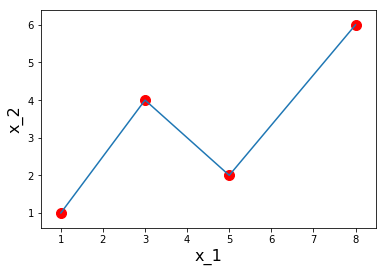

In [486]:
#fig = plt.figure(figsize=(6,5))
plt.plot(x_1, x_2);plt.scatter(x_1, x_2, marker='o', c='r', s=100);
plt.xlabel('x_1', fontsize=16);plt.ylabel('x_2', fontsize=16);

In [493]:
truncation_level = 3
pd.concat((pd.DataFrame({'multi_index':(ts.sigkeys(2, truncation_level)).split(' ')[1:]}),
           pd.DataFrame({'signatures':ts.stream2sig(data_stream, truncation_level)})),axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
multi_index,(),(1),(2),"(1,1)","(1,2)","(2,1)","(2,2)","(1,1,1)","(1,1,2)","(1,2,1)","(1,2,2)","(2,1,1)","(2,1,2)","(2,2,1)","(2,2,2)"
signatures,1,7,5,24.5,19,16,12.5,57.1667,54.6667,23.6667,30.3333,44.1667,34.3333,22.8333,20.8333


$$\textbf{Decision Trees}$$

A **decision tree** is a flowchart-like structure in which each internal node represents a **test** on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

<img src="plots/dec_tree.png"  align="center" style="width: 1000px;"/>

In [571]:
# example Iris flowers
from sklearn import tree
irisdata = datasets.load_iris()
X_iris, y_iris = irisdata.data[:,2:4], irisdata.target

In [610]:
    #ax.xlabel(irisdata.feature_names[2]);
    #ax.ylabel(irisdata.feature_names[3]);
    # fit decision tree
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree.fit(X_iris, y_iris);

# plot decision boundaries
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    # We only take the two corresponding features
    X = X_iris
    y = y_iris

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


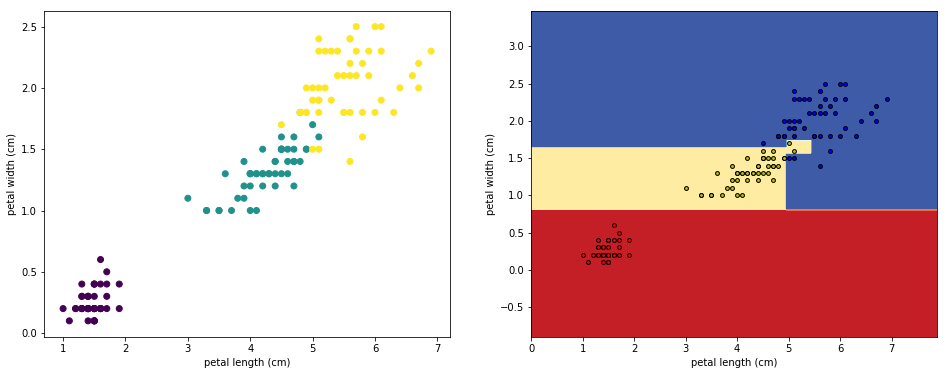

In [612]:
    ax = plt.figure(figsize=(16,6))
    # prepare 2D Iris data
    ax = plt.subplot(1,2,1)
    ax = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris);
    ax = plt.xlabel(irisdata.feature_names[2]);
    ax = plt.ylabel(irisdata.feature_names[3]);
    ax = plt.subplot(1,2,2)
    ax = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax = plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    ax = plt.xlabel(irisdata.feature_names[2]);
    ax = plt.ylabel(irisdata.feature_names[3]);



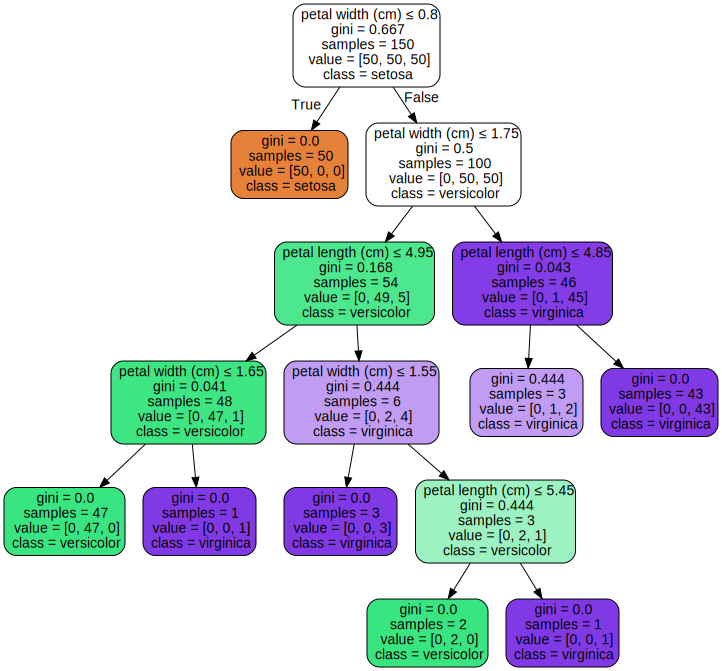

In [593]:
import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=irisdata.feature_names[2:],  
                         class_names=irisdata.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph